# Diode effect notebook 

### Important
* h5 are stored on the h5 files  hence temporary memory  is slowly filled. is recommended to  open temp files with win + r then type %temp% and delet the generated directories storing the h5 files, electro2_...
* The title parameter for the plot_solution function or any tdgl.plot methods is used for a modified function on the tdgl library  adding titles to the obtained figures either pass the titleBool as False on the group_plots function or remove every title reference in the plot_parameter and group_plots  methods from default_functions.py

* If you're using the developer version of py-tdgl(local library) you can implement the title parameter in each of the tdgl.plot_solution  methods. For vorticity and plot_scalar_potential just replace the string located in plt.title("") for a title parameter. As for the other methods just use the title parameter  inside the functions as  fig.suptitle(title, fontsize=16) 

* The parameter section must always be executed
* The create device can be modified to merge any kind of device. ( if you're using the default geometries be sure to add their imports from the tdgl)

### Collab exectution
* If you're using colab in your browser there are 2 ways to run it :
  + The firs one is quite simple: 
    * In your drive create a folder containing the scripts:
      1. The default_functions.py
      2. The default_directories.py
    * Copy the path to the folder where you uploaded 'default_functions.py'
    Replace 'My Drive/Path/To/Script' with the actual folder path inside your Drive.
    sys.path.append('path/name_of_the_folder')


  + Second one is a little more convoluted but allows you to keep just one file in your drive.
    * 1.  Copy the contents of the default_functions.py script into the functions cell on the colab section
    * 2.  Copy the contents of the directories.py(yet to be implemented) script into the dir cell on the colab section
    * 3. use ctr+H on chrome or ctr+f on vscode(if you're using the new colab extension) to get to the find section, search for df ,click the arrow left to the writting space and click replace all without typing anything on the replace writting space. (if you want to, select the match the whole word button.)  Repeat the same process but for dd
      4. Go to the collab Section
      5. Run the commented step for the installation of the required libraries
    
      6. Remove the imports: 
        * import default_directories as dd
        * import default_functions as df
      7. Remove the lines (if df is not removed):
        * import default_functions as df 
        * d = d  gamma = gamma
        * xi = xi           
        * london_lambda = london_lambda  
        * d = d               
        * gamma = gamma     
After that you'll be good to go
### Some advice
* Any of the functions used in this notebook can be used with any created device. It's just a matter of passing the device object to the function.
* To change the default simulation values you can edit the default_options and default_solutions functions to set the simulation times and any other parameters located on the default_functions.py script
* Each simulation section should run independently of the other sections as long as you've executed the parameters* section(customize the parameters as you see fit)
### Optional
* If your device supports it you can install cuda and run the script on your cpu adding the parameter on the tdgl.options located in the default_options function.
* If you're using a cluster you can divide the work needed to be done on the magnetization,varying currents or varying fields to save time.


# Table of contents
* [Colab](#colab)
* [Parameters*](#parameters) 
* [Simulations:](#simulations) 
    1.  [Different Fields for a Fixed Current](#1) 
    2.  [Zero currents](#zeroCurrents) \
        2.1 [Constant field, Fixed Current](#2.1) \
        2.2 [Varying field, Zero Current](#2.2) \
        2.3 [Fixed field,Zero Current,Different Heights](#2.3)
    3.  [Magnetization](#magnetizations) 
    4.  [Varying Currents](#varyingCurrents) \
       4.1 [Constant field](#4.1)\
       4.2 [Zero field,Different Heights](#4.2)\
       4.3 [Different Fields](#4.3)


# Colab <a name="parameters"></a>

In [1]:
#if "google.colab" in str(get_ipython()):
#    %pip install --quiet git+https://github.com/loganbvh/py-tdgl.git
#    !apt install ffmpeg

### 1st method

In [2]:
### 1. Mount Google Drive
#drive.mount('/content/drive')

# 2. Add the path to the folder where you uploaded 'default_functions.py'
# Replace 'My Drive/Path/To/Script' with the actual folder path inside your Drive.
#sys.path.append('/content/drive/MyDrive/electrodinámica 2/proyecto_final')
# Now, import your module with an alias
# Assuming your module file is named 'my_module.py' 1. Mount Google Drive
#drive.mount('/content/drive')

# 2. Add the path to the folder where you uploaded 'default_functions.py'
# Replace 'My Drive/Path/To/Script' with the actual folder path inside your Drive.
#sys.path.append('My Drive/Path/To/Script')


### Directories

In [3]:
####################################################
#Copy the contents of the dir.py here#
####################################################



### Functions

In [4]:
####################################################
#Copy the contents of the default_functions.py here#
####################################################

# Parameters* <a name="parameters"></a>

In [1]:
from tdgl.visualization.animate import create_animation
from tdgl.geometry import box
from IPython.display import HTML, display
from IPython.display import clear_output
from tdgl.sources import ConstantField
import matplotlib.pyplot as plt
import default_directories as dd
import default_functions as df
import numpy as np
import tempfile
import h5py
import tdgl
import time
import os



c:\Users\alejo\anaconda3\envs\electro2\Lib\site-packages\cupy\_environment.py:596: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
c:\Users\alejo\anaconda3\envs\electro2\Lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawk

In [2]:
# ====================================================
#Directory setup
# ====================================================
#deletes the images of all the previous runs
dd.clean_source()
section1_dir,section2_dir,section3_dir,section4_dir, subsection21_dir,subsection22_dir,subsection23_dir,subsection41_dir,subsection42_dir,subsection43_dir = dd.create_default_directories()


In [3]:

# ====================================================
## 1. ⚙️ Global Parameters(Optimized)
# ====================================================
### 1.1 figure parameters
figure_size = (10,4)
exp_vor =  "$\\vec{\\omega}=\\vec{\\nabla}\\times\\vec{K}$"
exp_sp = "$\\mu/v_0$"
### 1.2. Material parameters
LENGTH_UNITS = "um"
xi = df.xi           
london_lambda = df.london_lambda  
d = df.d               
gamma = df.gamma            
###Main rectangle
# Ancho del puente (dimensión x)
width_x = 5.0
# Alto del puente (dimensión y)
height_y = 12.0
STRIPE_LENGTH = 0.01   # side of the square contact
OVERLAP = 0.5         # aditional space for overlapping
###Rectangulo pequeño
width_x2 = width_x/2
height_y2 =(height_y/2)+ 1
dimensions = {"width_x":width_x,"width_x2": width_x/2,"height_y":height_y,"height_y2":height_y2}
### 1.3. Parámetros de Malla
MAX_EDGE_LENGTH_IV = xi / 1.5
MAX_EDGE_LENGTH_VORTEX = xi / 1.5
SMOOTHING_STEPS = 100            
# Geometría inicial y capa
film_poly = tdgl.Polygon("film_base", points=box(width=width_x, height=height_y))
film_poly_down = tdgl.Polygon("film_pequeño", points=box(width=width_x2, height=height_y2)).translate(dx=-width_x/2)
half_geometry = film_poly.union(film_poly,film_poly_down)
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=gamma)
print(f'widths: width_x:{width_x},width_x2:{width_x2},height_y:{height_y},height_y2:{height_y2},height_y2_altered:{3}' )

widths: width_x:5.0,width_x2:2.5,height_y:12.0,height_y2:7.0,height_y2_altered:3


## Device* <a name="device"></a>

Device and mesh creation

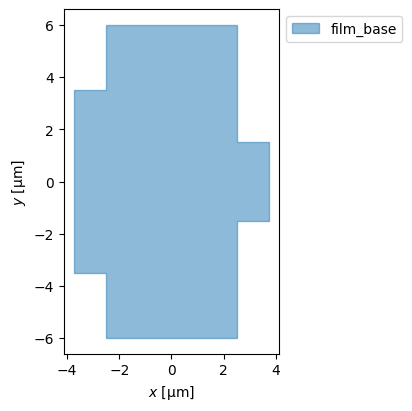

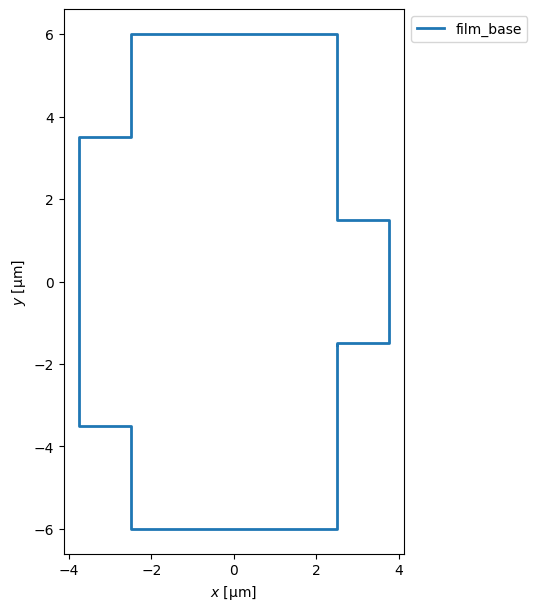

In [4]:
displacement = (width_x + width_x2 + STRIPE_LENGTH) / 2
device_fast = df.create_device(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,incrementy=0,translationx=displacement)
fig, ax = device_fast.plot(mesh=False)

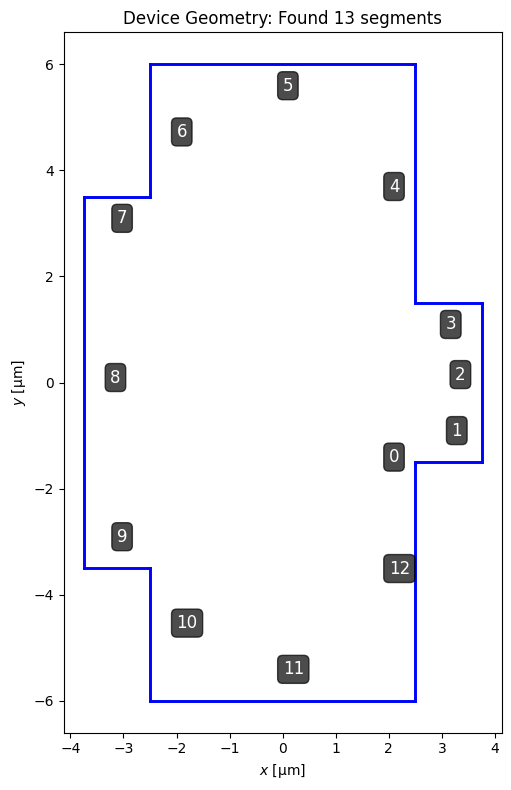

In [5]:
# Visualize and get the list of segments
segments_found = df.visualize_segments(device_fast)

Remeshing... Probes placed 3.0um apart at center.


Constructing Voronoi polygons: 100%|██████████| 2785/2785 [00:02<00:00, 992.65it/s] 


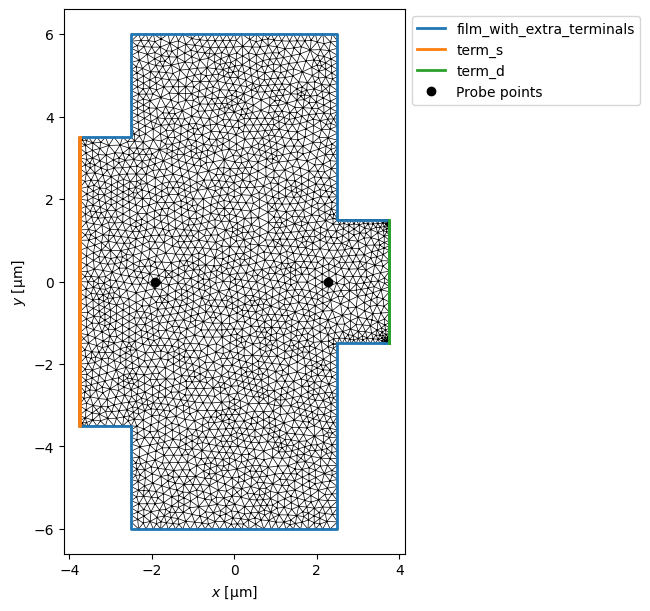

In [6]:

# 2. Define your list of terminals
# Example: A 4-terminal measurement setup
my_terminals = [
    {"id": 8,  "name": "s"},
    {"id": 2, "name": "d"}
]

# 3. Create the device
# This will now work and place probes at the first 2 terminals automatically
device_fast = df.add_multiple_terminals(
    device_fast, 
    segments_found, 
    my_terminals, 
    layer, 
    MAX_EDGE_LENGTH_IV,
    stripe_length=STRIPE_LENGTH
)

# Simulations <a name="simulations"></a>


## 1) different fields for a fixed current <a name="1"></a>

In [7]:
used_field = 0.0 
currents = {
    "term_s": 15,
    "term_d": -15
}

Simulating: 100%|██████████| 200/200 [00:46<00:00,  4.33tau/s ]


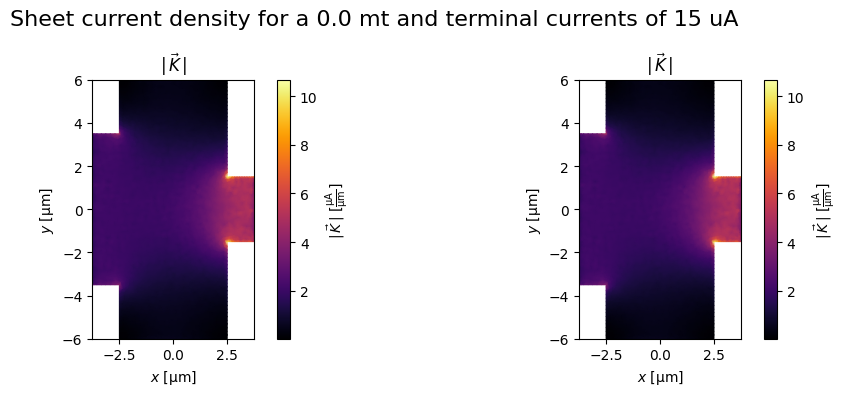

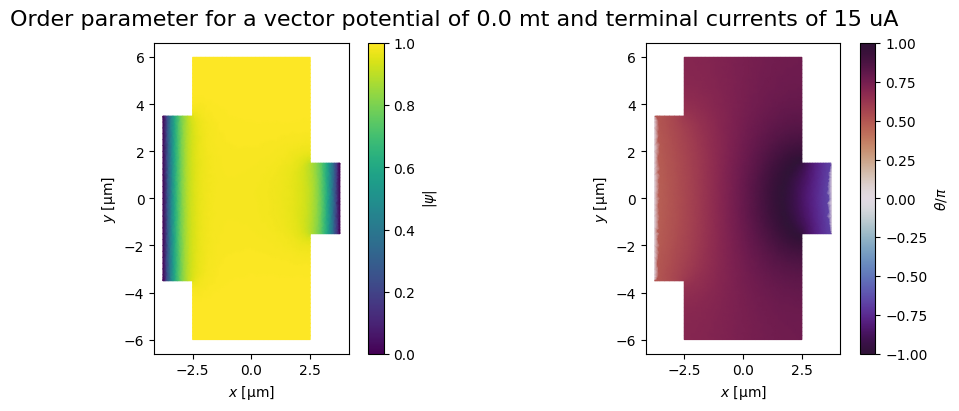

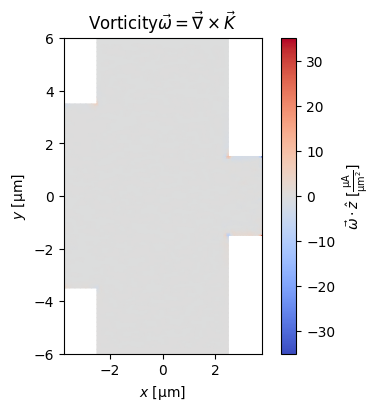

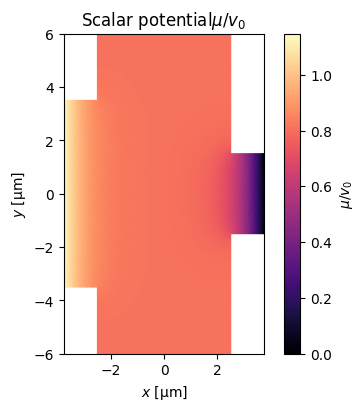

In [8]:

zero_field_solution = df.default_solution(device_fast,"zero_field_zero_current.h5",terminal_currents_applied=currents,vector_potential = used_field)
titles_group = {
    "sheet_current": f'Sheet current density for a {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=True,titleBool=True,order_path=section1_dir+f'/scd_{used_field}_field_{currents["term_s"]}ma.jpg',current_path=section1_dir+f'/op_{used_field}_field_{currents["term_s"]}ma.jpg')

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\zero_field_zero_current-1.h5.
Simulating: 100%|██████████| 200/200 [01:15<00:00,  2.64tau/s ]


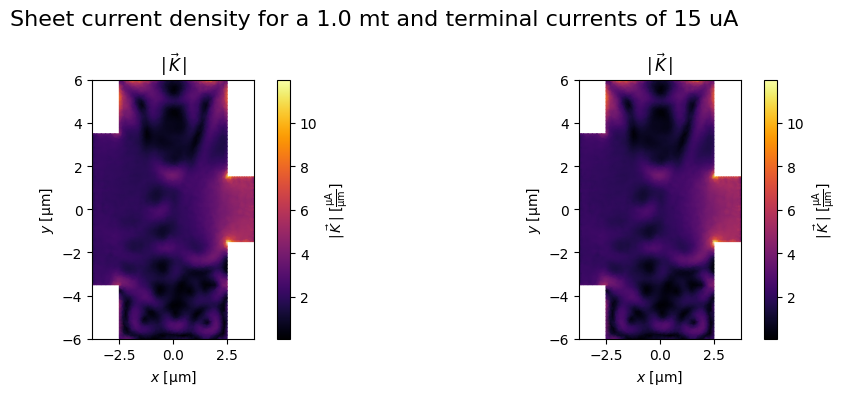

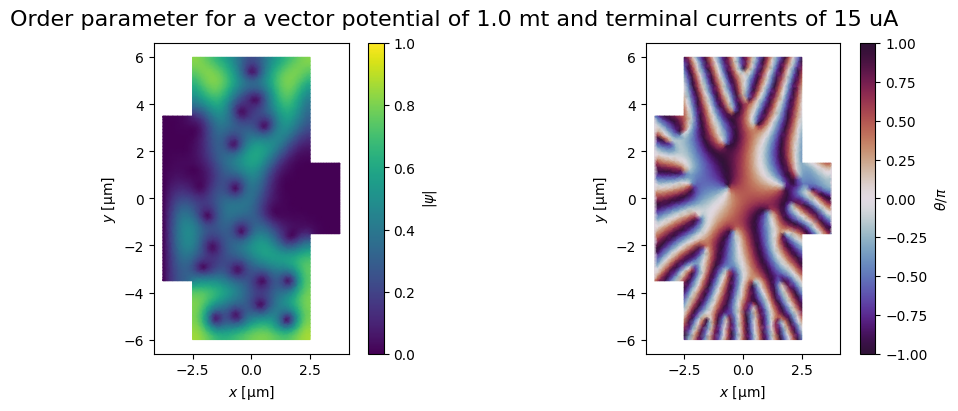

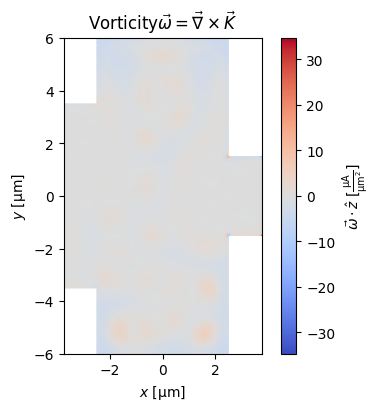

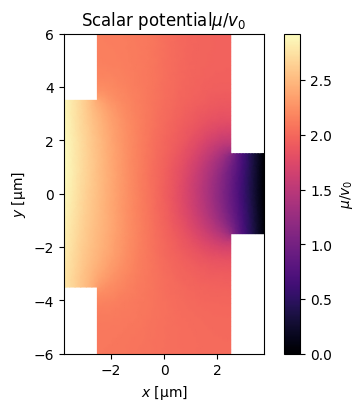

In [ ]:
used_field = 1.0
zero_field_solution = df.default_solution(device_fast,"zero_field_zero_current.h5",terminal_currents_applied=currents,vector_potential = used_field)
titles_group = {
    "sheet_current": f'Sheet current density for a {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=True,titleBool=True,order_path=section1_dir+f'/scd_{used_field}_field_{currents["term_s"]}ma.jpg',current_path=section1_dir+f'/op_{used_field}_field_{currents["term_s"]}ma.jpg')

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\zero_field_zero_current-2.h5.
Simulating: 100%|█████████▉| 200/200 [01:15<00:00,  2.65tau/s ]


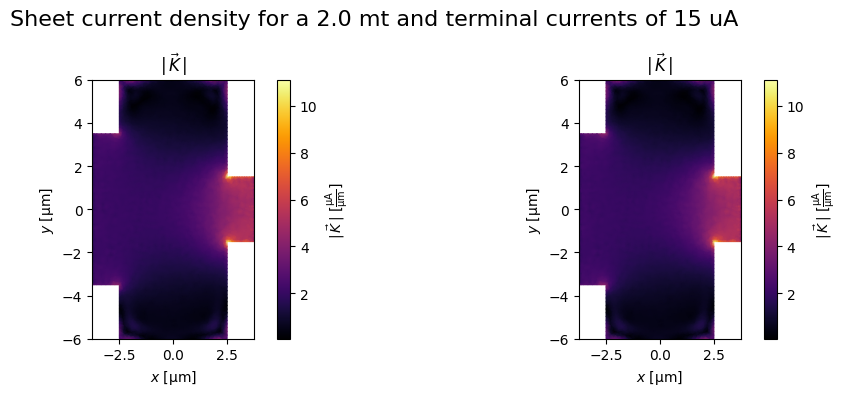

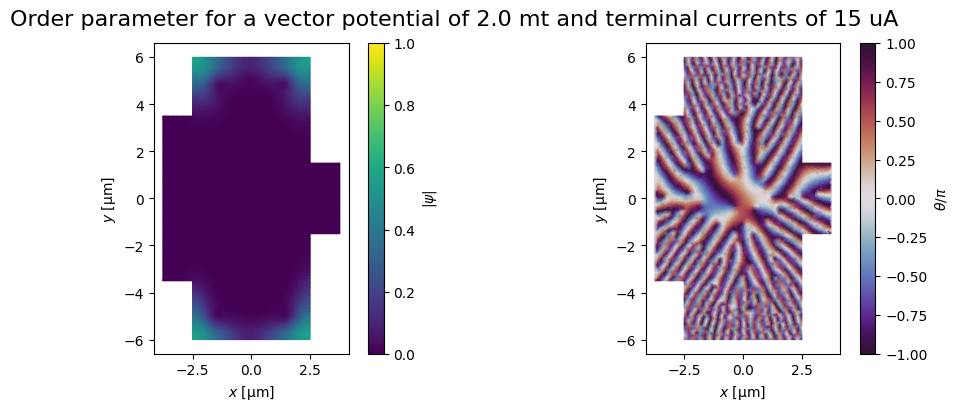

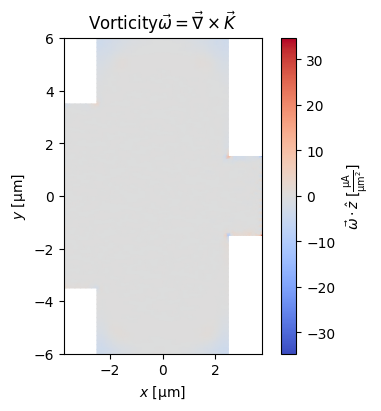

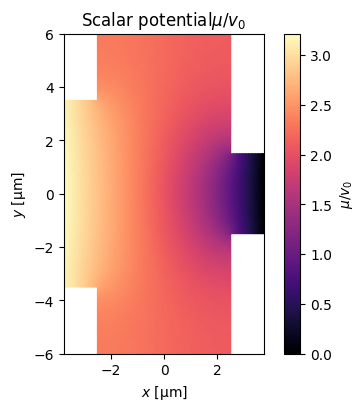

In [ ]:
used_field = 2.0
used_title = f'Sheet current density for a {used_field} mt'

zero_field_solution = df.default_solution(device_fast,"zero_field_zero_current.h5",terminal_currents_applied=currents,vector_potential = used_field)
titles_group = {
    "sheet_current": f'Sheet current density for a {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=True,titleBool=True,order_path=section1_dir+f'/scd_{used_field}_field_{currents["term_s"]}ma.jpg',current_path=section1_dir+f'/op_{used_field}_field_{currents["term_s"]}ma.jpg')

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\zero_field_zero_current-3.h5.
Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.14tau/s ]


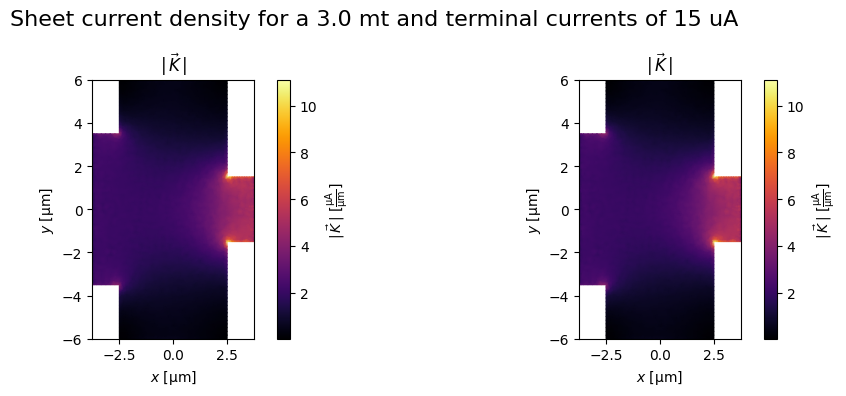

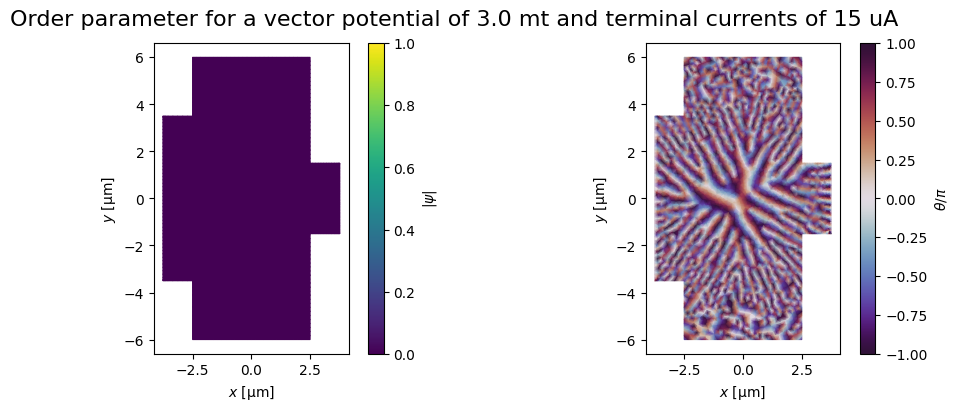

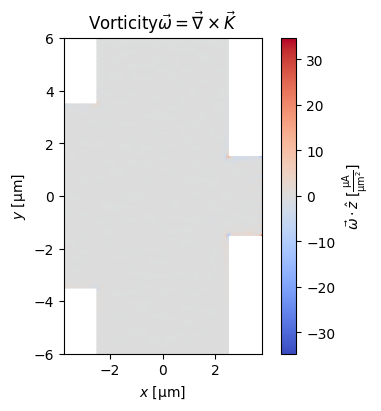

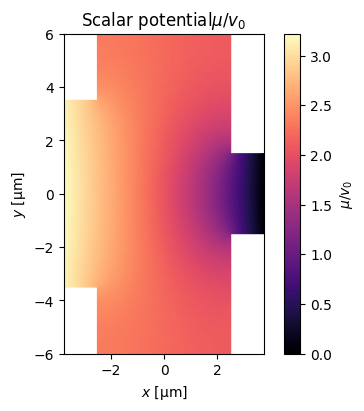

In [ ]:
used_field = 3.0

zero_field_solution = df.default_solution(device_fast,"zero_field_zero_current.h5",terminal_currents_applied=currents,vector_potential = used_field)
titles_group = {
    "sheet_current": f'Sheet current density for a {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and terminal currents of {currents["term_s"]} uA',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=True,titleBool=True,order_path=section1_dir+f'/scd_{used_field}_field_{currents["term_s"]}ma.jpg',current_path=section1_dir+f'/op_{used_field}_field_{currents["term_s"]}ma.jpg')

## 2)Zero Currents <a name="zeroCurrents"></a>

### 2.1)Cst Field <a name="2.1"></a>

Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.46tau/s ]


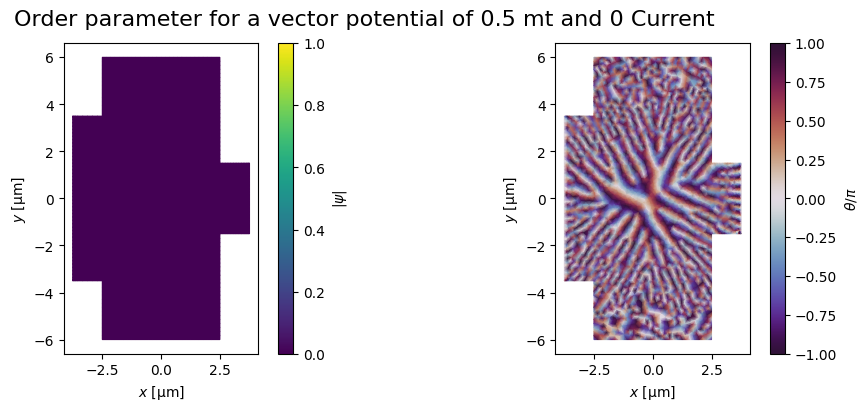

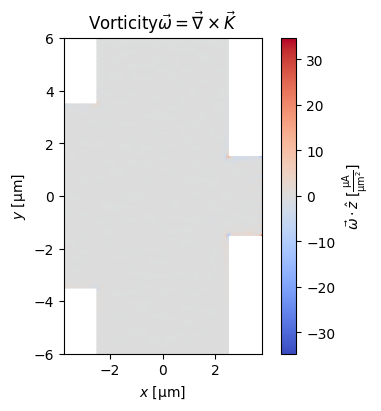

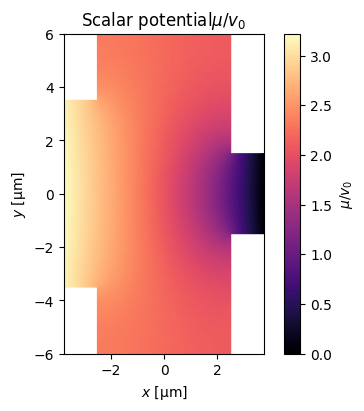

In [ ]:
used_field = 0.5
zero_current_solution =  df.default_solution(device_fast, "weak-link-zero-field.h5",vector_potential=used_field)
titles_group = {
    "sheet_current": f'',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and 0 Current',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=False,titleBool=True,order_path=subsection21_dir+f'/af_{used_field}_field_0ma.jpg')

### 2.2)varying fields <a name="2.1"></a>

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-1.h5.
Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.68tau/s ]


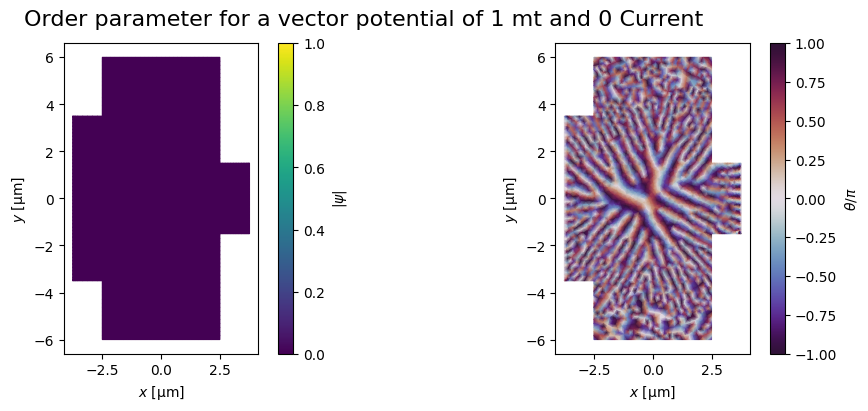

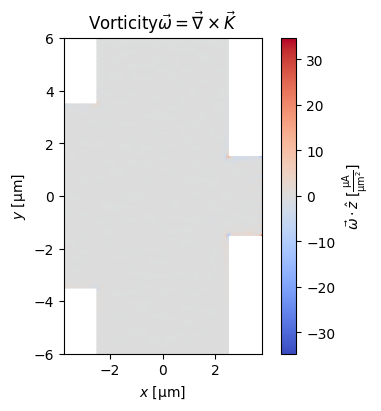

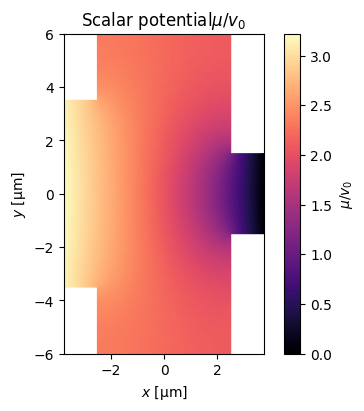

In [ ]:
used_field = 1
zero_current_solution =  df.default_solution(device_fast, "weak-link-zero-field.h5",vector_potential=used_field)
titles_group = {
    "sheet_current": f'',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and 0 Current',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=False,titleBool=True,order_path= subsection22_dir+f'/af_{used_field}_field_0ma.jpg')

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-2.h5.
Simulating: 100%|█████████▉| 200/200 [01:05<00:00,  3.05tau/s ]


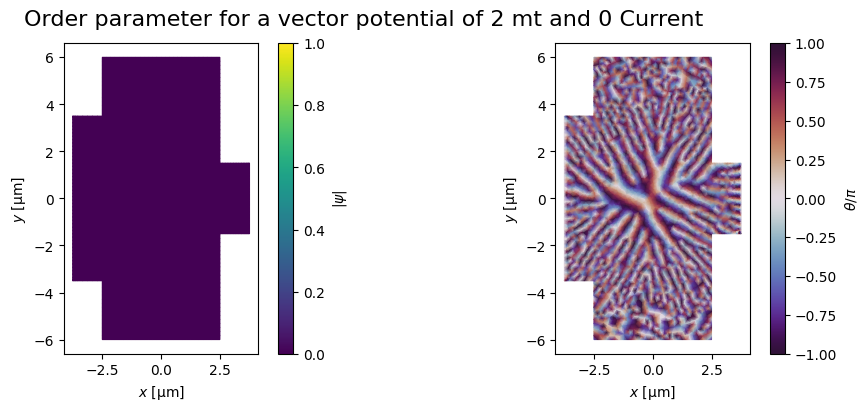

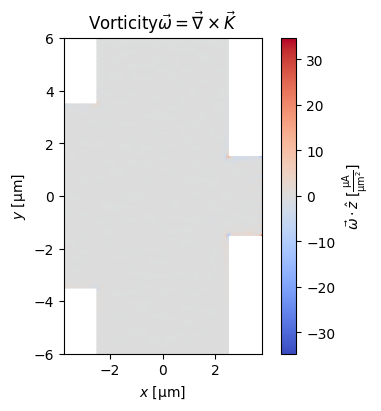

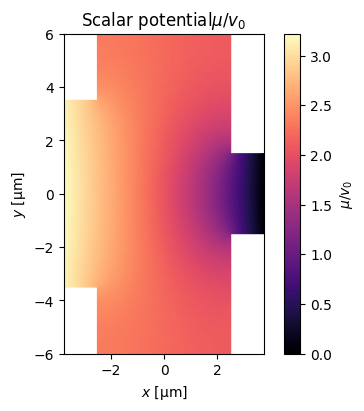

In [ ]:
used_field = 2
zero_current_solution =  df.default_solution(device_fast, "weak-link-zero-field.h5",vector_potential=used_field)
titles_group = {
    "sheet_current": f'',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and 0 Current',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=False,titleBool=True,order_path=subsection22_dir+f'/af_{used_field}_field_0ma.jpg')

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-3.h5.
Simulating: 100%|██████████| 200/200 [00:53<00:00,  3.73tau/s ]


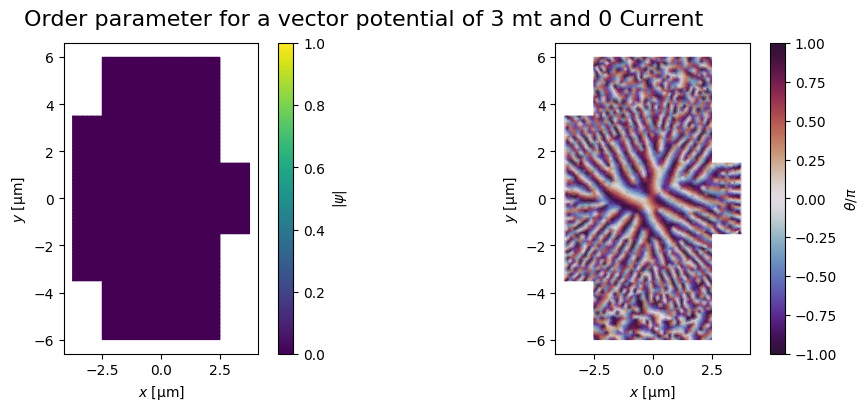

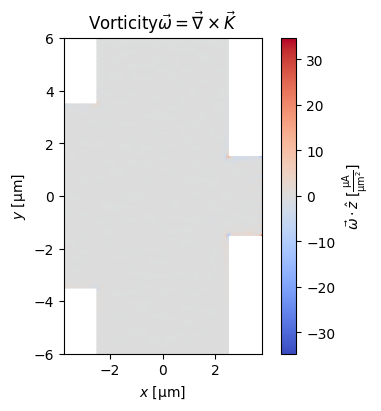

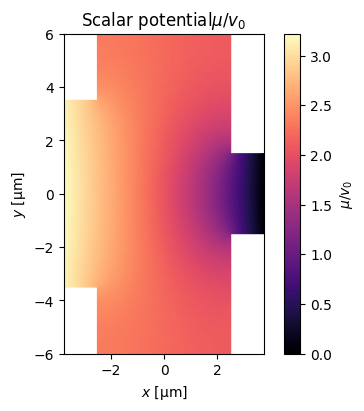

In [ ]:
used_field = 3
zero_current_solution =  df.default_solution(device_fast, "weak-link-zero-field.h5",vector_potential=used_field)
titles_group = {
    "sheet_current": f'',
    "order_parameter": f'Order parameter for a vector potential of {used_field} mt and 0 Current',
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=False,titleBool=True,order_path=subsection22_dir+f'/af_{used_field}_field_0ma.jpg')

In [16]:
#if MAKE_ANIMATIONS:
#    zero_current_solution_video = df.make_video_from_solution(
#        zero_current_solution,
#        quantities=["order_parameter", "phase", "scalar_potential"],
#        figsize=(6.5, 4),
 
#    )
#    display(zero_current_solution_video)

### 2.3)Fixed field/different height increments <a name="2.3"></a>

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-4.h5.


  Malla creada: 3132 puntos


Simulating: 100%|██████████| 200/200 [01:12<00:00,  2.75tau/s ]


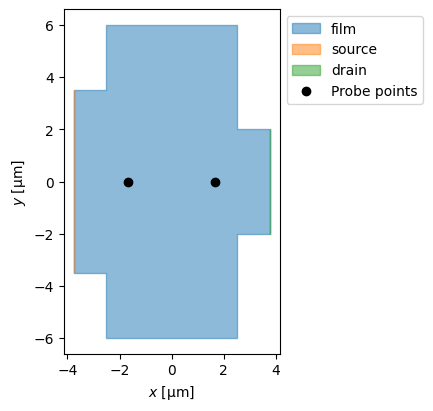

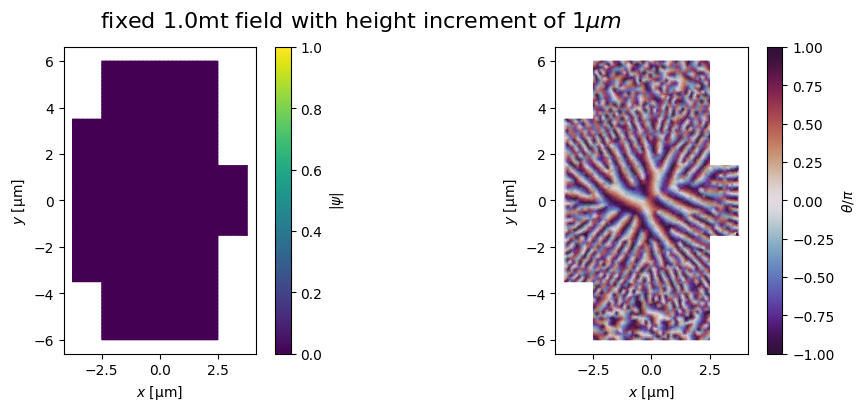

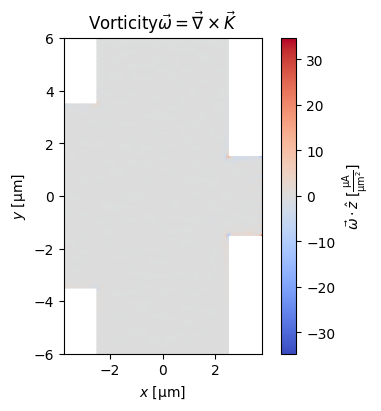

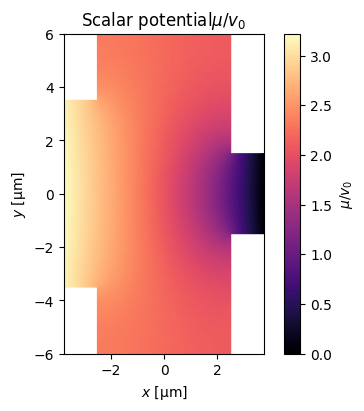

In [ ]:
height_increment = 1
used_field = 1.0
order_title = f'order parameter for a height increment of {height_increment}'+ r"$\mu m $"
device_1 = df.create_device(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,translationx=displacement,incrementy=height_increment)#h = 4
zero_current_solution =  df.default_solution(device_1, "weak-link-zero-field.h5",vector_potential=used_field)

titles_group = {
    "sheet_current": f'',
    "order_parameter": f'fixed 1.0mt field with height increment of {height_increment}'+ r"$\mu m $",
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_field_solution,(5,4),titles_group,currentBool=False,titleBool=True,order_path=subsection23_dir+f'/{used_field}_field_0ma_{height_increment}microm_increment.jpg')


Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-5.h5.


  Malla creada: 3387 puntos


Simulating: 100%|██████████| 200/200 [01:06<00:00,  3.02tau/s ]


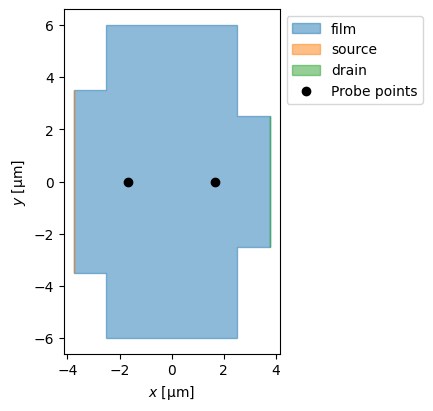

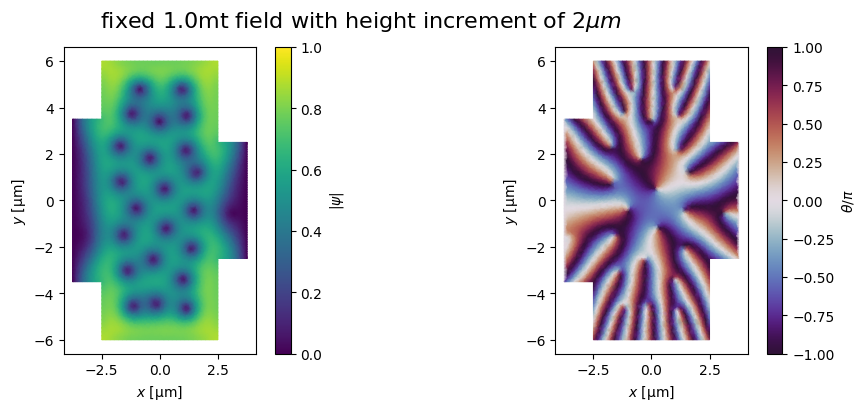

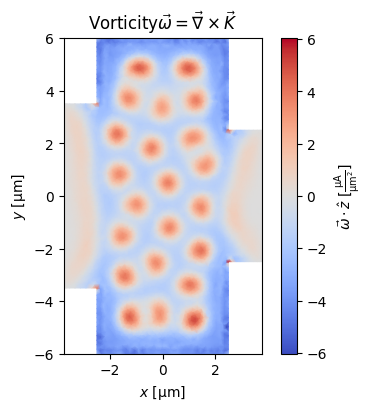

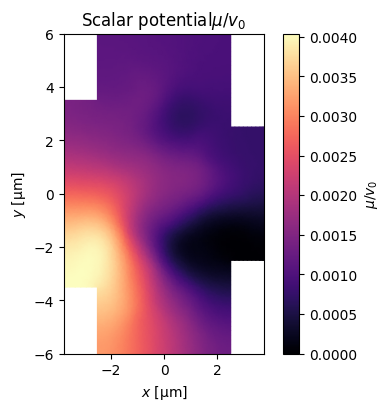

In [19]:
height_increment = 2 
used_field = 1.0
order_title = f'order parameter for a height increment of {height_increment}'+ r"$\mu m $"
device_1 = df.create_device(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,translationx=displacement,incrementy=height_increment)#h = 4
zero_current_solution =  df.default_solution(device_1, "weak-link-zero-field.h5",vector_potential=used_field)

titles_group = {
    "sheet_current": f'',
    "order_parameter": f'fixed 1.0mt field with height increment of {height_increment}'+ r"$\mu m $",
    "vorticity":"Vorticity"+exp_vor,
    "scalar_potential": "Scalar potential"+ exp_sp
}
df.plot_group(zero_current_solution,(5,4),titles_group,currentBool=False)

Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpagv351h2\weak-link-zero-field-6.h5.


  Malla creada: 3121 puntos


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.47tau/s ]


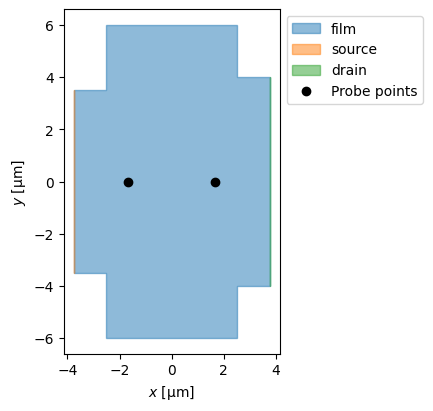

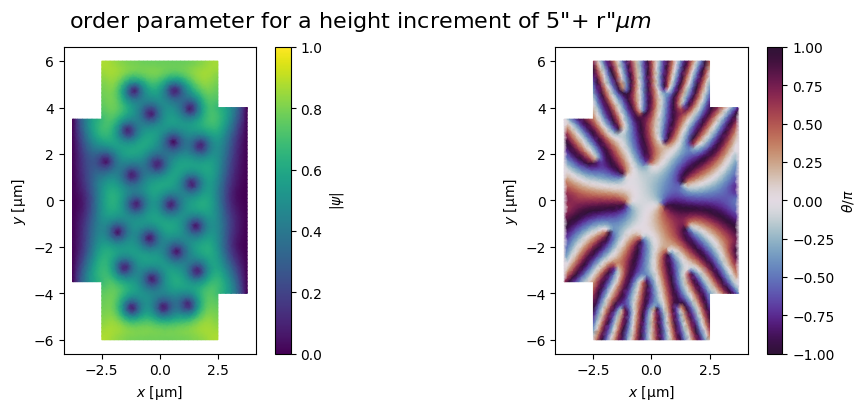

In [20]:
height_increment = 5
order_subtitle = f'order parameter for a height increment of {height_increment}"+ r"$\mu m$ '
device_1 = df.create_device(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,translationx=displacement,incrementy=height_increment)#h = 8 micro m
zero_current_solution_1 =  df.default_solution(device_1, "weak-link-zero-field.h5",vector_potential=1)
fig, axes = zero_current_solution_1.plot_order_parameter(figsize=figure_size,subtitle=order_subtitle)


## 3)Magnetization <a name="magnetizations"></a>

Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.09tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-1.h5.
Simulating: 100%|██████████| 200/200 [00:59<00:00,  3.36tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-2.h5.
Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.27tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-3.h5.
Simulating: 100%|█████████▉| 200/200 [01:05<00:00,  3.07tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-4.h5.
Simulating: 100%|██████████| 200/200 [00:59<00:00,  3.36tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-5.h5.
Simulating: 100%|██████████| 200/200 [01:10<00:00,  2.83tau/s ]
Output file already exists. Renaming to C:\Users\alejo\AppData\Local\Temp\tmpay0osp61\Bscan-6.h5.
Simulating: 100%|█████████▉|

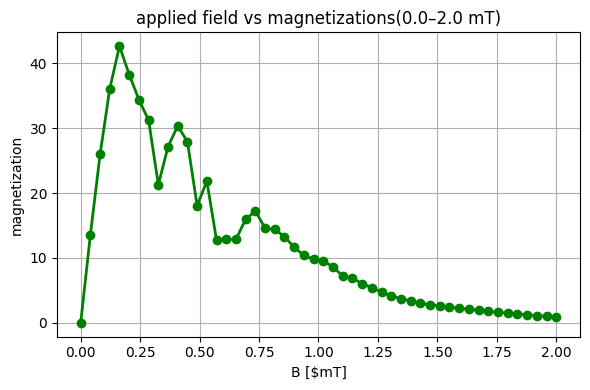

<Figure size 800x600 with 0 Axes>

In [ ]:

# =========================
# 2) Applied field
# =========================
field_o = 0.0
field_f = 2.0
field_steps = 50
applied_field = np.linspace(field_o,field_f,field_steps)  # External field on mT (B)
field_solutions,magnetization,susceptibility = df.solve_field(device_fast,applied_field,section3_dir)
plot_info = plot_labels={"fig_name":"currents.jpg","title":f'applied field vs magnetizations({field_o}–{field_f} mT)',"x":"B [$mT]","y":"magnetization"}
df.plot_parameters(applied_field, -magnetization,color_applied="green",plot_labels = plot_info,dir_path = section3_dir+'/applied_field_vs_magnetization.jpg')

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alejo\AppData\Local\Temp\ipykernel_10592\1654190119.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("susceptibility [$\mu m$]")


Text(0.5, 1.0, 'applied field vs susceptibility')

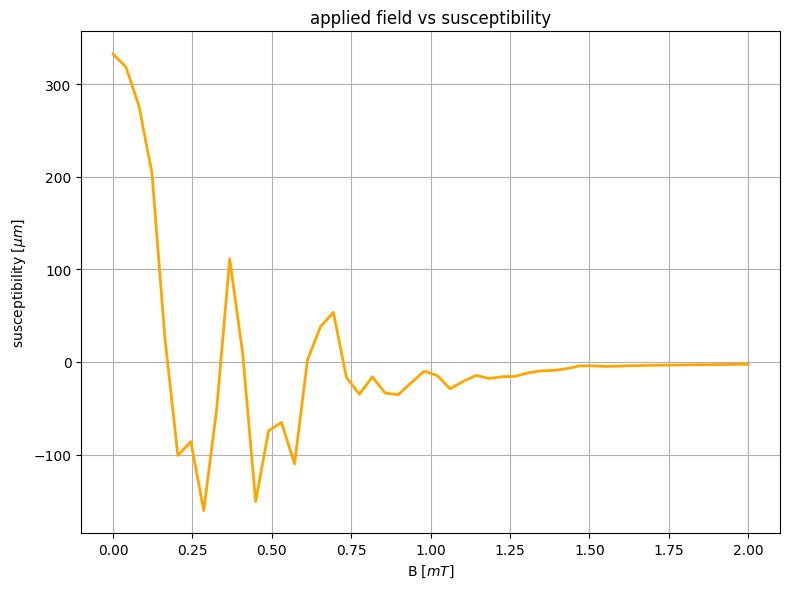

In [ ]:
plt.plot(applied_field, -susceptibility,color="orange")
plt.xlabel("B [$mT$]")
plt.ylabel("susceptibility [$\mu m$]")
plt.grid()
plt.title("applied field vs susceptibility")
plt.savefig(section3_dir+'/applied_field_vs_susceptibility.jpg')

## 4) varying currents <a name="varyingCurrents"></a>

### 4.1)Cst field/No height increments <a name="4.1"></a>

For now we make a superficial sweep with a # of steps that allows to see more or less where the critic currents are locted, then we sweep around those points with way more detail.
However i plan to observe the difference between points to see if a current treshold can be applied and automatically  sweep around the critic currents.

--------------------------------------------------
✅ The simulation was completed with 150 steps.
⏱️ The elapsed time was: 35438.09 seconds.
⏱️ The elapsed time was: 590.63 minutes.
📊 Tiempo mean time per step was: 236.25 seconds.
--------------------------------------------------


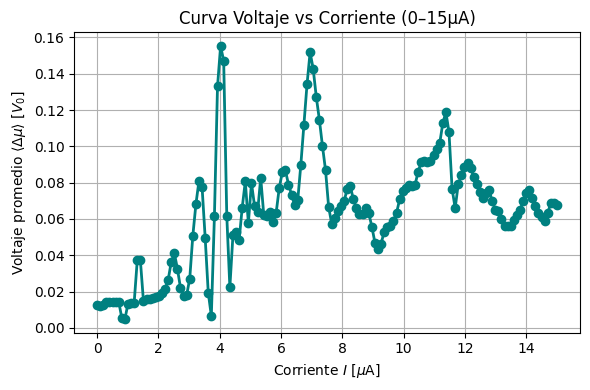

<Figure size 800x600 with 0 Axes>

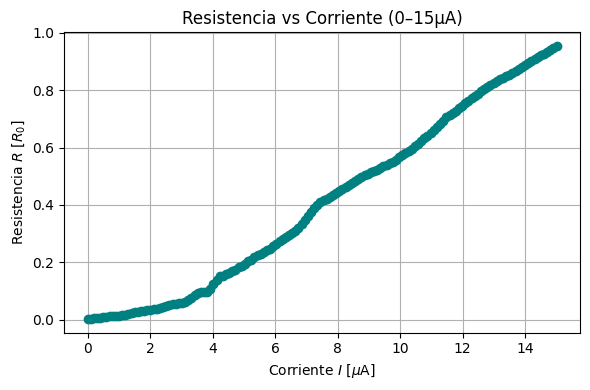

<Figure size 800x600 with 0 Axes>

In [ ]:
co= 0
ci= 15 # current_interval
steps = 150
currents = np.linspace(co, ci, steps)
#It can also be donde with a linear step increment
#step = 0.5
#curents = np.arange(co, ci, step)
#currents = np.linspace(-ci, ci, steps)
file_path = subsection42_dir +'/voltage_vs_current.txt'
resistances,voltages = df.current_application(device_fast, currents,B_field = 1.0)
#We plot and save the info of the voltage vs current and resistance vs current
plot_info1 = {"fig_name":"currents.jpg","title":f'Curva Voltaje vs Corriente ({co}–{ci}µA)',"x":"Corriente $I$ [$\mu$A]","y":"Voltaje promedio $\\langle \Delta \\mu \\rangle$ [$V_0$]"}
plot_info2 = {"fig_name":"resistances.jpg","title":f'Resistencia vs Corriente ({co}–{ci}µA)',"x":"Corriente $I$ [$\mu$A]","y":"Resistencia $R$ [$R_0$]"}

df.plot_parameters(currents,voltages,plot_info1, plot_type = "plot",dir_path = subsection41_dir +'/voltage_vs_current.jpg')
df.plot_parameters(currents,resistances,plot_info2, plot_type = "plot",dir_path = subsection42_dir +'/resistance_vs_current.jpg')


In [10]:
critic_regions = df.find_critic_regions(currents,voltages)
print(f'Critical regions found at currents: {critic_regions} µA')

Critical regions found at currents: [3.82550336 3.9261745 ] µA


--------------------------------------------------
✅ The simulation was completed with 3 steps.
⏱️ The elapsed time was: 455.43 seconds.
⏱️ The elapsed time was: 7.59 minutes.
📊 Tiempo mean time per step was: 151.81 seconds.
--------------------------------------------------


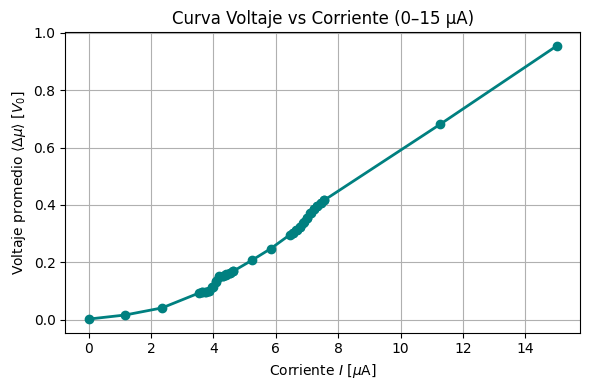

In [ ]:

critic_amount = int(np.round((steps*0.6)/np.size(critic_regions)))
normal_amount = int(np.round((steps*0.4)/(np.size(critic_regions)+1)))
current_interval = {"initial":co,"final":ci}
augmented_currents,augmente_voltages,augmented_resistance = df.critic_currents_augmentation(device_fast,critic_regions,current_interval,steps=normal_amount,critic_steps=critic_amount)

### 4.2) Zero field with varying currents and device modifications <a name="4.2"></a>

In [7]:
print(f'widths: width_x:{width_x},width_x2:{width_x2},height_y:{height_y},height_y2:{height_y2},height_y2_altered:{3}' )


widths: width_x:5.0,width_x2:2.5,height_y:12.0,height_y2:7.0,height_y2_altered:3


In [7]:
co= 0
ci= 15 # current_interval
steps = 90
currents = np.linspace(co, ci, steps)

--------------------------------------------------
✅ The simulation was completed with 90 steps.
⏱️ The elapsed time was: 14440.74 seconds.
⏱️ The elapsed time was: 240.68 minutes.
📊 Tiempo mean time per step was: 160.45 seconds.
--------------------------------------------------


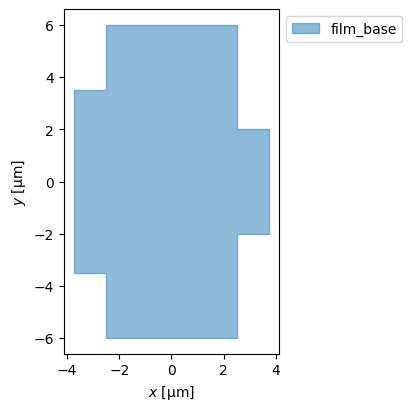

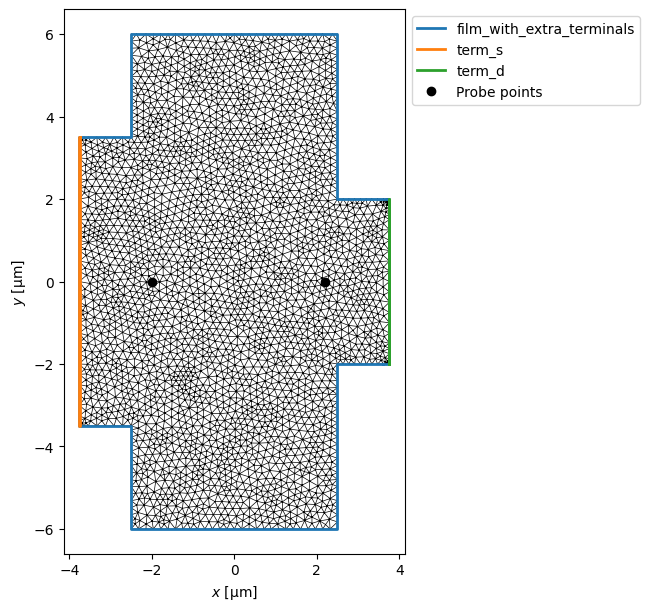

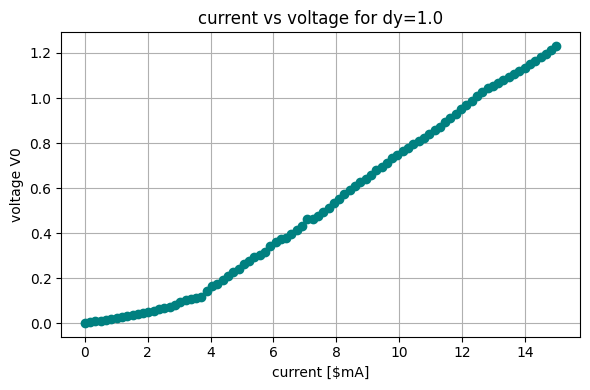

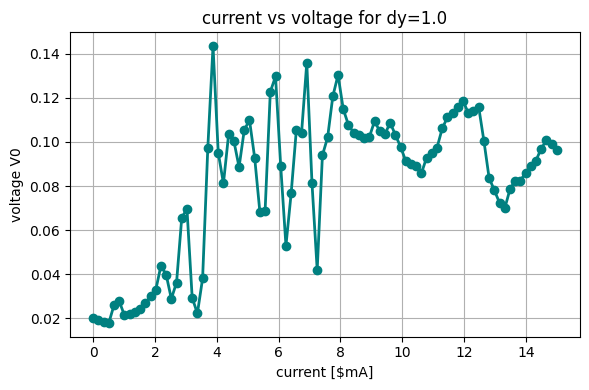

In [8]:
h = 1.0
file_path = subsection42_dir +f'/voltage_vs_current_varying_height_dy_{h}.txt'
voltages_1,resistances_1 = df.varying_increments(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,displacement,currents,file_path,deltay = h)
plot_info1 ={"fig_name":"currents.jpg","title":f'current vs voltage for dy={h}',"x":"current [$mA]","y":"voltage V0"}
plot_info2 ={"fig_name":"currents.jpg","title":f'current vs  resistance for dy={h}',"x":"current [$mA]","y":"voltage V0"}
df.plot_parameters(currents,voltages_1,plot_info1, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_current_deltay{h}.jpg')
df.plot_parameters(currents,resistances_1,plot_info2, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_resistance_deltay{h}.jpg')

In [ ]:
h = 2.0
file_path = subsection42_dir +f'/voltage_vs_current_varying_height_dy_{h}.txt'
voltages_2,resistances_1 = df.varying_increments(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,displacement,currents,file_path,deltay = h)
plot_info1 ={"fig_name":"currents.jpg","title":f'current vs voltage for dy={h}',"x":"current [$mA]","y":"voltage V0"}
plot_info2 ={"fig_name":"resistance.jpg","title":f'current vs  resistance for dy={h}',"x":"current [$mA]","y":"voltage V0"}
df.plot_parameters(currents,voltages_1,plot_info1, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_current_deltay{h}.jpg')
df.plot_parameters(currents,resistances_1,plot_info2, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_resistance_deltay{h}.jpg')


Remeshing... Probes placed 3.0um apart at center.


In [ ]:
h = 3.0
file_path = subsection42_dir +f'/voltage_vs_current_varying_height_dy_{h}.txt'
voltages_3,resistances_1 = df.varying_increments(half_geometry,layer,MAX_EDGE_LENGTH_IV,dimensions,displacement,currents,file_path,deltay = h)
plot_info1 ={"fig_name":"currents.jpg","title":f'current vs voltage for dy={h}',"x":"current [$mA]","y":"voltage V0"}
plot_info2 ={"fig_name":"currents.jpg","title":f'current vs  resistance for dy={h}',"x":"current [$mA]","y":"voltage V0"}
df.plot_parameters(currents,voltages_1,plot_info1, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_current_deltay{h}.jpg')
df.plot_parameters(currents,resistances_1,plot_info2, plot_type = "plot",dir_path = subsection42_dir +f'/voltage_vs_resistance_deltay{h}.jpg')


In [ ]:

plt.scatter(currents,voltages_1,color="blue",label="h=4")
plt.scatter(currents,voltages_2,color="red",label="h=5")
plt.scatter(currents,voltages_3,color="green",label="h=7")
plt.title("Voltage vs Current for varying heights")
plt.xlabel("currents [$\mu A$]")
plt.ylabel("voltages [$V_0$]")
plt.savefig(subsection42_dir+'/voltage_vs_current_varying_height.jpg')
plt.show()

### 4.3) Different fields/varying currents <a name="4.3"></a>

In [ ]:
co= 0
ci= 15 # current_interval
steps = 30
currents = np.linspace(co, ci, steps)
for applied_field in range(1,4):
    voltages = df.current_application(device_fast, currents,B_field =applied_field)
    actual_voltages = voltages 
    plot_info1 = {"fig_name":"currents.jpg","title":f'Curva Voltaje vs Corriente ({co}–{ci}µA)',"x":"Corriente $I$ [$\mu$A]","y":"Voltaje promedio $\\langle \Delta \\mu \\rangle$ [$V_0$]"}
    df.plot_parameters(currents,actual_voltages,plot_info1)